In [66]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
df_of_train = pd.read_csv('Monthly_data_cmo.csv')

In [3]:
for i in range(len(df_of_train)):
    df_of_train['Commodity'][i] = df_of_train['Commodity'][i].lower()

C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
print(df_of_train.head(10))

         APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          bajri  2015  April               79       1406   
1  Ahmednagar          bajri  2016  April              106       1788   
2  Ahmednagar  wheat(husked)  2015  April             1253       1572   
3  Ahmednagar  wheat(husked)  2016  April              387       1750   
4  Ahmednagar  sorgum(jawar)  2015  April             3825       1600   
5  Ahmednagar  sorgum(jawar)  2016  April             2093       1695   
6  Ahmednagar          maize  2015  April               75       1345   
7  Ahmednagar          maize  2016  April              155       1367   
8  Ahmednagar           gram  2015  April             1794       3533   
9  Ahmednagar           gram  2016  April              630       4790   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2   

In [5]:
print(df_of_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB
None


In [6]:
df_of_train.isnull().values.any()

False

In [7]:
print(df_of_train.describe())

               Year  arrivals_in_qtl     min_price     max_price  \
count  62429.000000     6.242900e+04  6.242900e+04  6.242900e+04   
mean    2015.337503     6.043088e+03  2.945228e+03  3.688814e+03   
std        0.690451     3.470331e+04  1.318396e+04  7.662962e+03   
min     2014.000000     1.000000e+00  0.000000e+00  0.000000e+00   
25%     2015.000000     3.800000e+01  1.250000e+03  1.600000e+03   
50%     2015.000000     2.110000e+02  1.976000e+03  2.797000e+03   
75%     2016.000000     1.364000e+03  3.900000e+03  4.647000e+03   
max     2016.000000     1.450254e+06  3.153038e+06  1.600090e+06   

         modal_price  
count   62429.000000  
mean     3296.003989  
std      3607.792534  
min         0.000000  
25%      1450.000000  
50%      2425.000000  
75%      4257.000000  
max    142344.000000  


In [8]:
# note that some samples from populations have 0 minimum value for min,max,modal price
# note that for modal price 75% of data is below 4257 & rest 25% data(approx 15600 data points) is distributed between 4257 and 142344(range of 138087) denpting the sparsity of remaining 25% data.

In [9]:
list_of_commodity_items = df_of_train['Commodity'].unique()
print(len(list_of_commodity_items))
print(list_of_commodity_items)

204
['bajri' 'wheat(husked)' 'sorgum(jawar)' 'maize' 'gram' 'horse gram'
 'matki' 'pigeon pea (tur)' 'black gram' 'castor seed' 'soybean' 'jaggery'
 'lemon' 'ginger (fresh)' 'potato' 'ladies finger' 'flower' 'carrot'
 'cluster bean' 'ghevda' 'ghosali(bhaji)' 'mango(raw)' 'cucumber' 'onion'
 'bitter gourd' 'cabbage' 'garlic' 'math (bhaji)' 'capsicum' 'tomato'
 'brinjal' 'tamarind' 'tamarind seed' 'coriander (dry)' 'green chilli'
 'chillies(red)' 'mustard' 'paddy-unhusked' 'hilda' 'chikoo' 'cotton'
 'ground nut pods (dry)' 'pomegranate' 'papai' 'melon' 'beet root'
 'bottle gourd' 'dhemse' 'coriander ' 'coriander  ' 'spinach' 'shevga'
 'small gourd' 'grapes' 'kharbuj' 'green gram' 'sunflower' 'safflower'
 'mango' 'water melon' 'mosambi' 'orange' 'fenugreek' 'cowpea'
 'green peas (dry)' 'squash gourd' 'maize (corn.)' 'chino' 'curry leaves'
 'sweet potato' 'walvad' 'rice(paddy-hus)' 'custard apple' 'green-peas'
 'maize(corn.)' 'bhagar/vari' 'bor' 'kardai' 'other vegetables' 'radish'
 'wal p

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


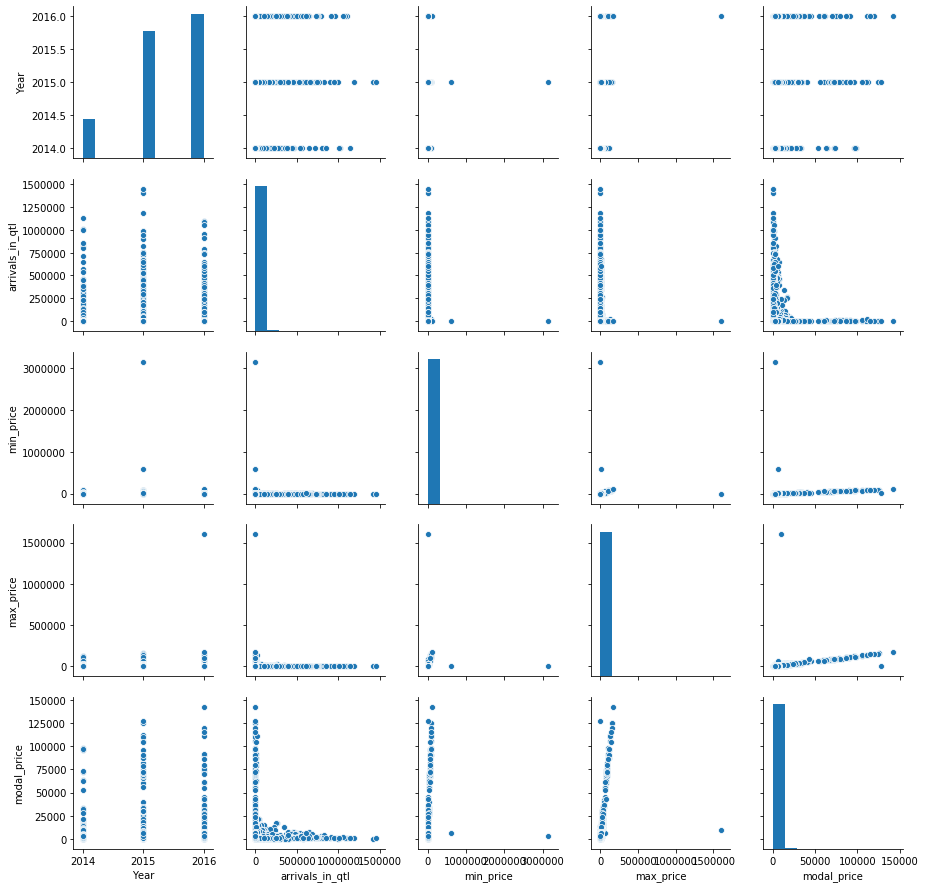

In [11]:
sns.pairplot(df_of_train)

In [12]:
# we see that commodities with low band of modal price has higher arrivals_in_qtl
# in some data points in graph between modal_price vs min-price vs max_price, there is sudden spike indicating a sigh of possible anamoly. 

In [13]:
list_of_index_to_drop = []

for i in range(len(df_of_train)):
    if df_of_train['min_price'][i] <= df_of_train['modal_price'][i] and df_of_train['max_price'][i] >= df_of_train['modal_price'][i]:
        pass
    else:
        list_of_index_to_drop.append(i)

In [14]:
print(len(list_of_index_to_drop))

748


In [15]:
df_of_train_after_index_removal = df_of_train.drop(list_of_index_to_drop)

In [16]:
print(len(df_of_train))
print(len(df_of_train_after_index_removal))

62429
61681


In [17]:
import scipy
import scipy.stats as ss

In [18]:
ss.skew(df_of_train_after_index_removal['modal_price'])

12.761980959293089

In [19]:
# as expected modal price of data is not normally distributed.

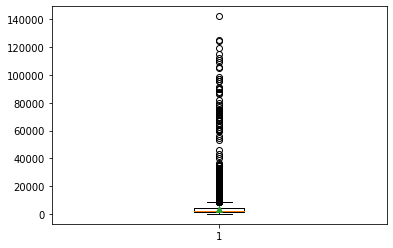

In [20]:
ax = plt.boxplot(df_of_train_after_index_removal['modal_price'],showmeans=True)

In [21]:
# large value of skew and presence of anamoly (considering modal price) is reflected by above graph.

In [22]:
df_of_train_after_index_removal.corr()

Year  arrivals_in_qtl  min_price  max_price  modal_price
Year             1.000000        -0.007345   0.040356   0.021729     0.040460
arrivals_in_qtl -0.007345         1.000000  -0.057700  -0.013787    -0.037952
min_price        0.040356        -0.057700   1.000000   0.511511     0.975077
max_price        0.021729        -0.013787   0.511511   1.000000     0.545871
modal_price      0.040460        -0.037952   0.975077   0.545871     1.000000

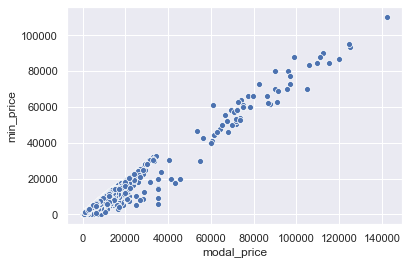

In [23]:
x = df_of_train_after_index_removal['modal_price']
y = df_of_train_after_index_removal['min_price']
sns.set(style ="darkgrid") 
sns.scatterplot(x,y)

In [43]:
# note the gap between high +ve corr between modal_prive & min_price and relatively low corr between max_price and modal_price
# note that some commodities r having 0 as their modal price

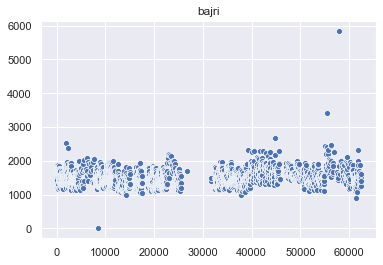

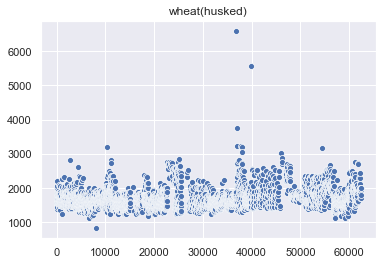

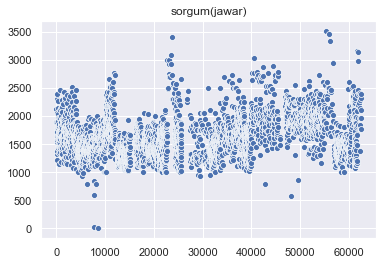

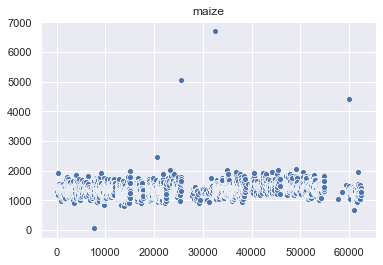

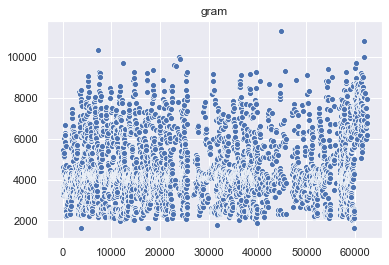

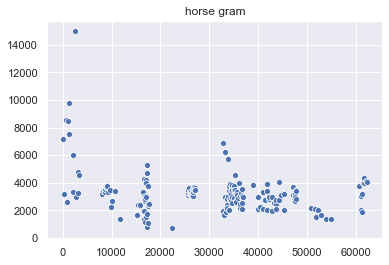

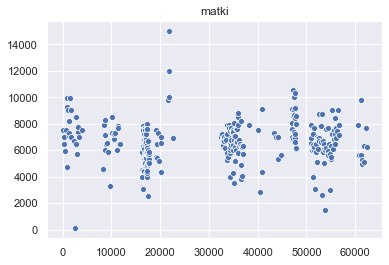

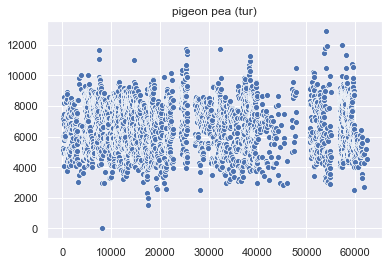

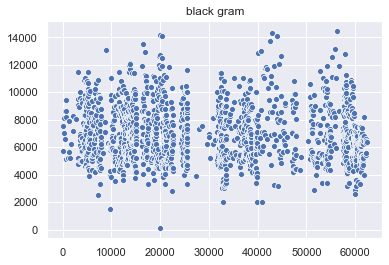

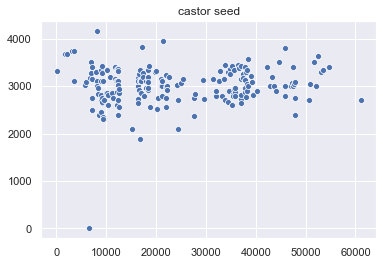

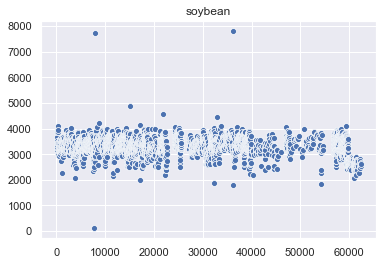

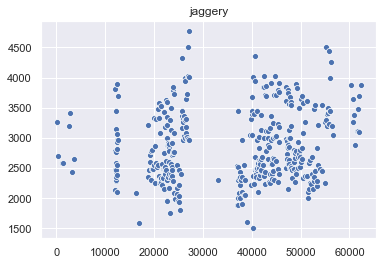

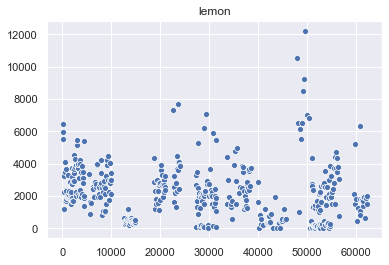

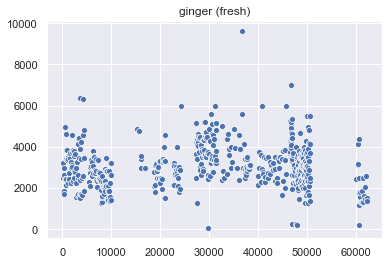

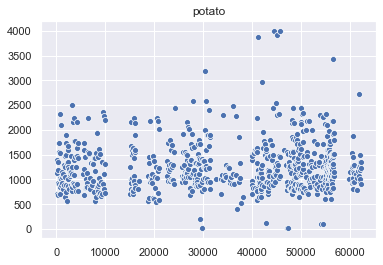

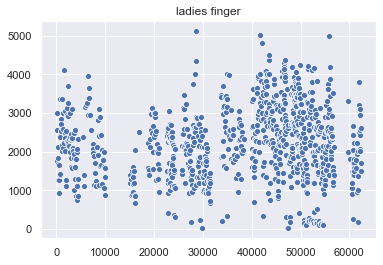

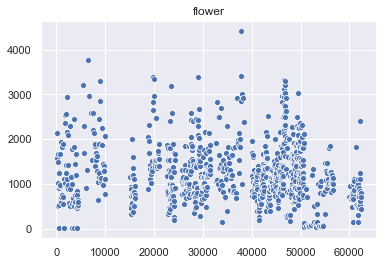

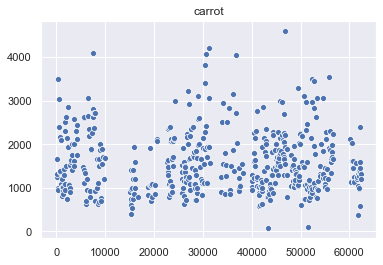

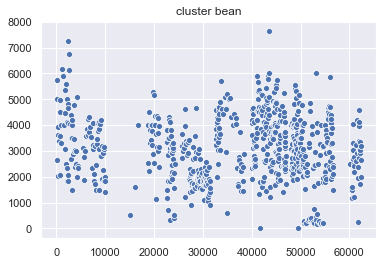

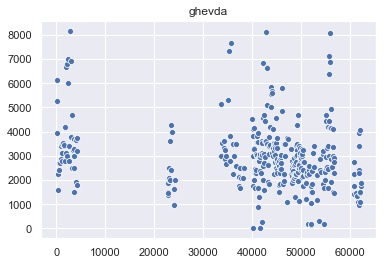

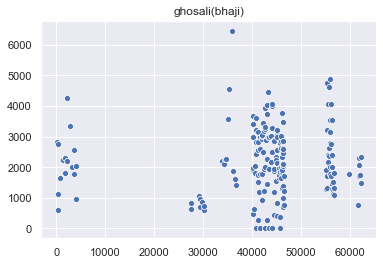

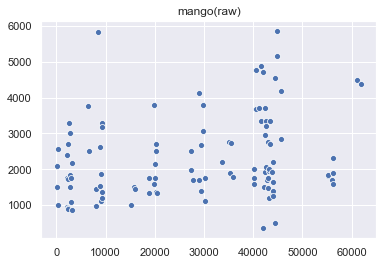

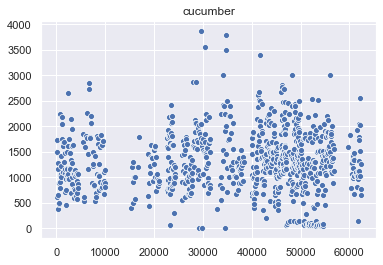

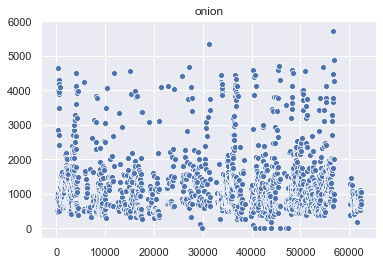

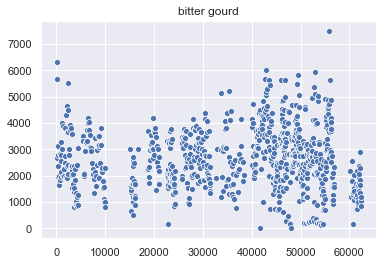

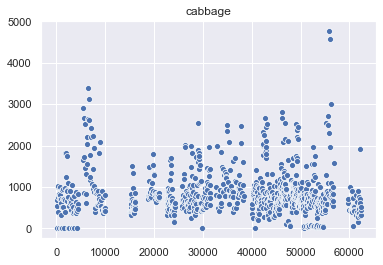

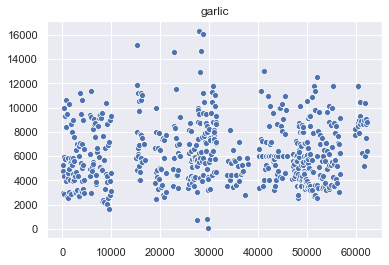

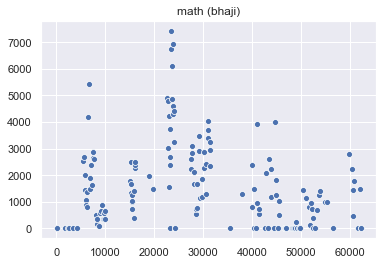

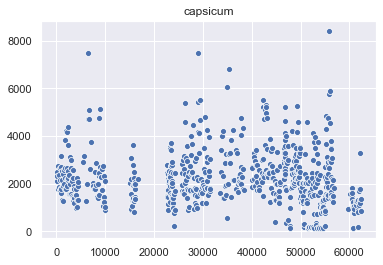

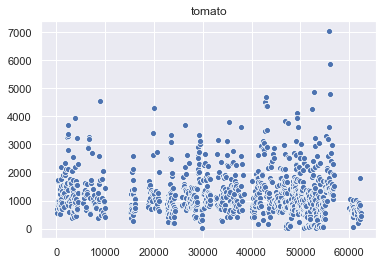

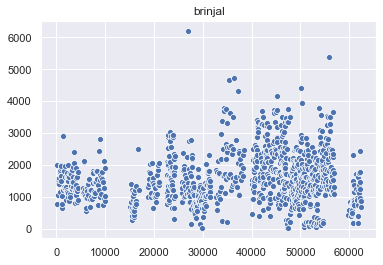

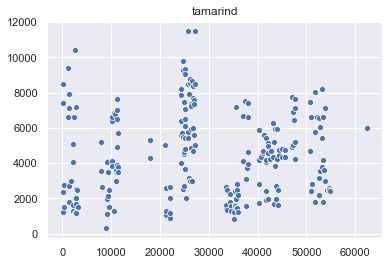

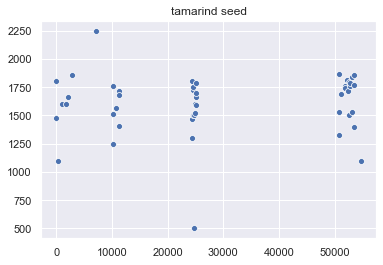

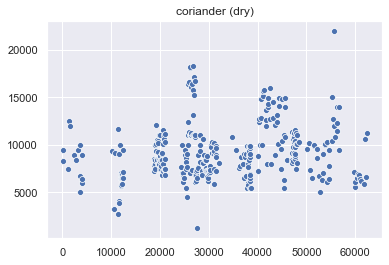

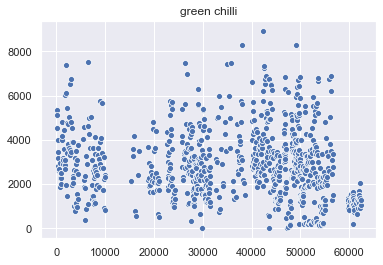

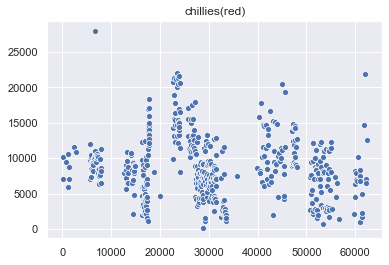

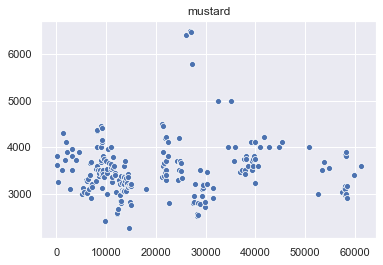

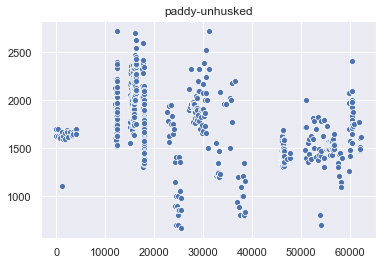

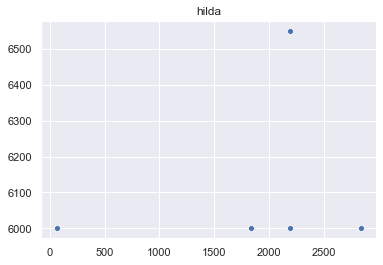

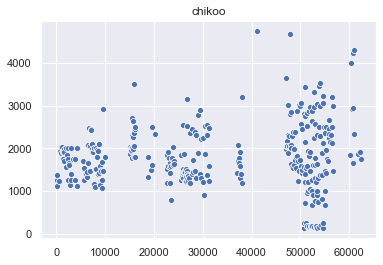

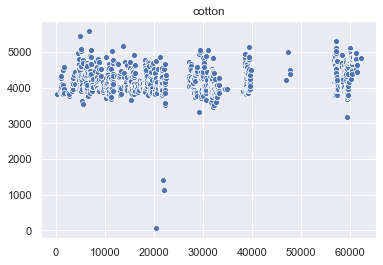

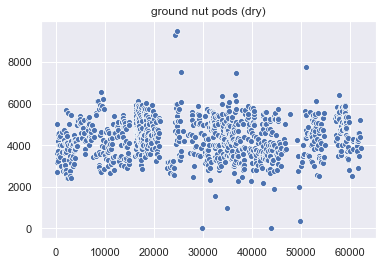

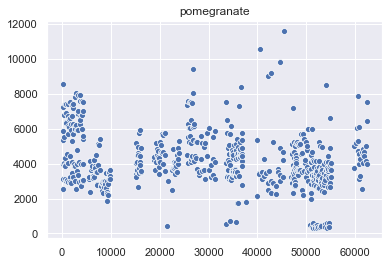

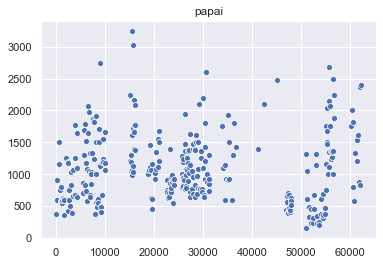

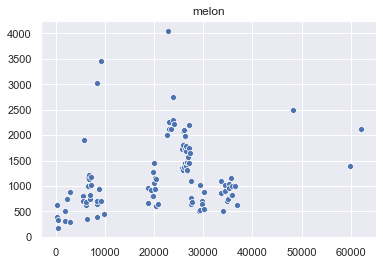

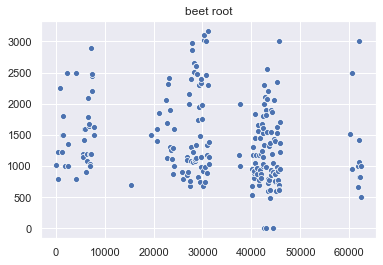

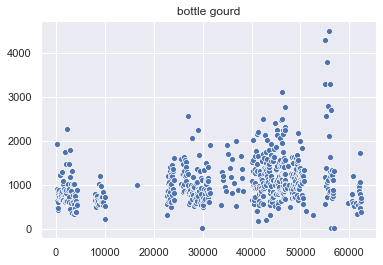

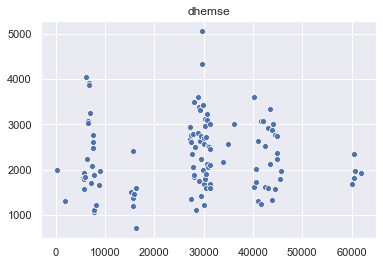

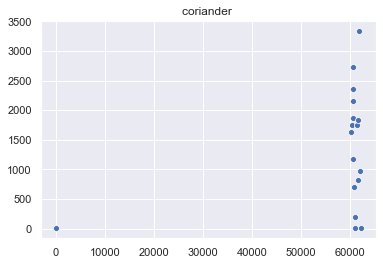

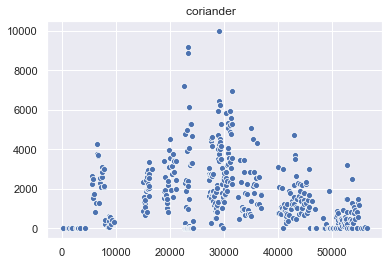

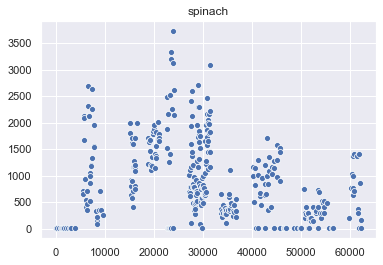

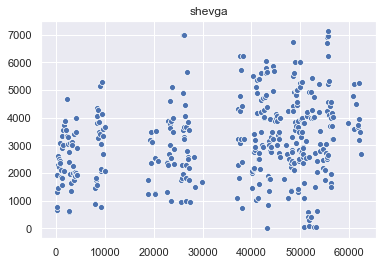

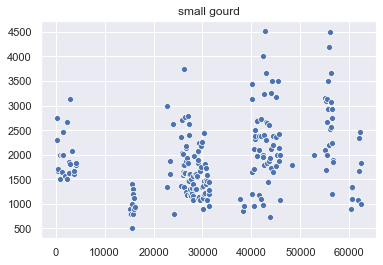

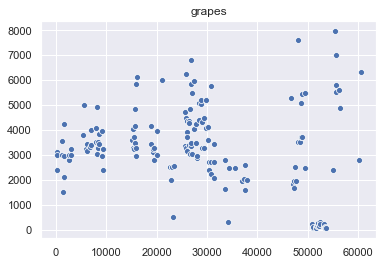

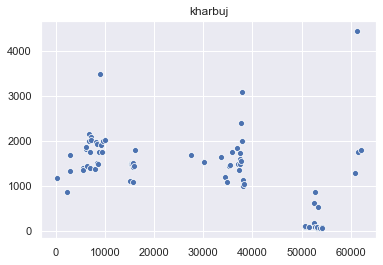

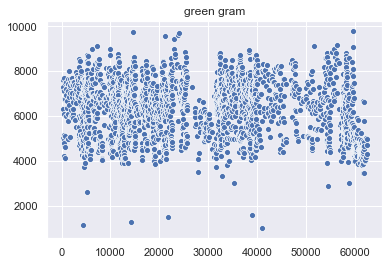

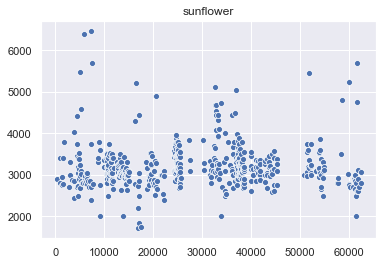

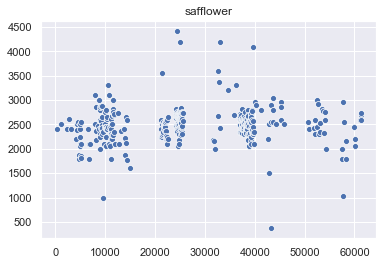

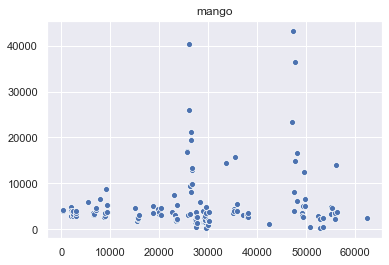

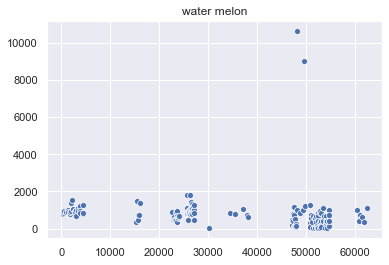

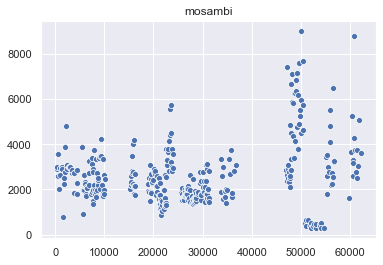

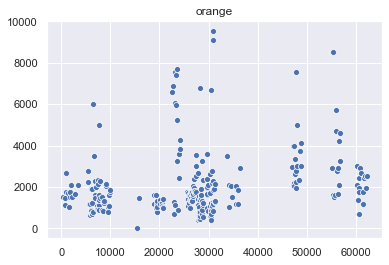

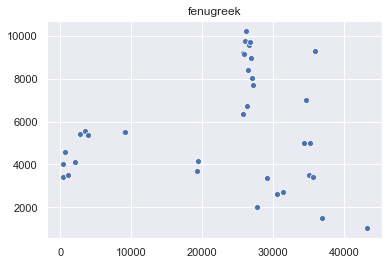

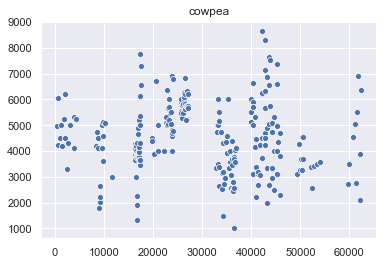

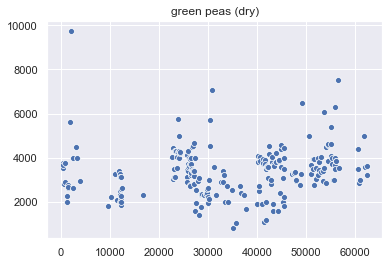

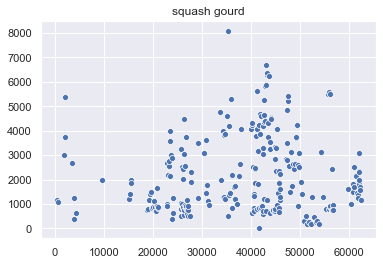

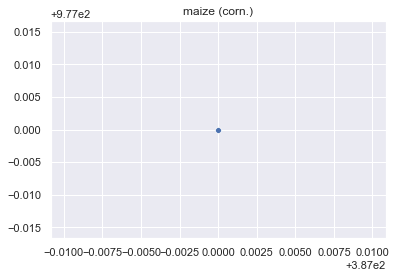

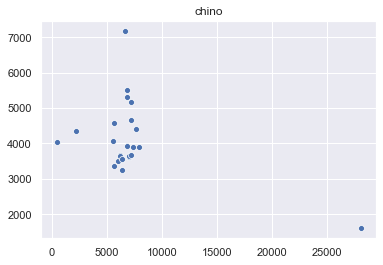

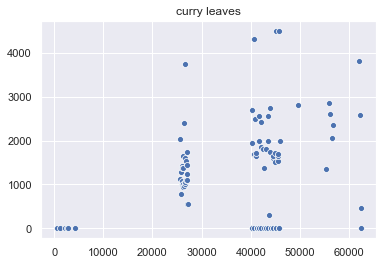

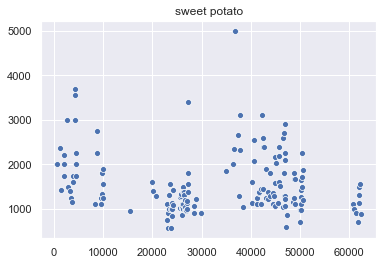

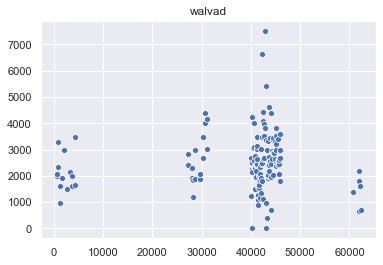

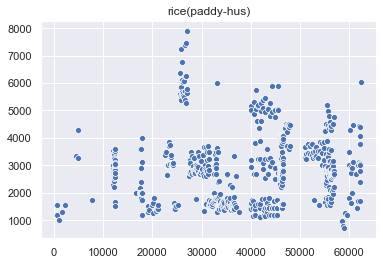

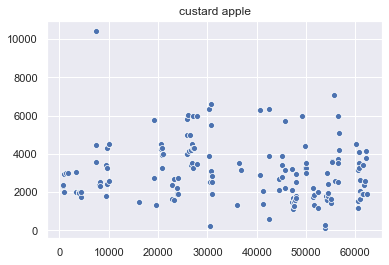

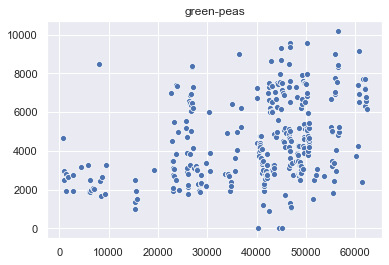

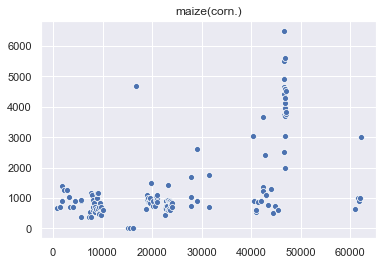

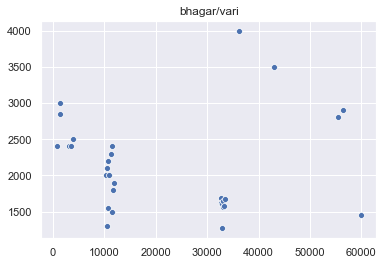

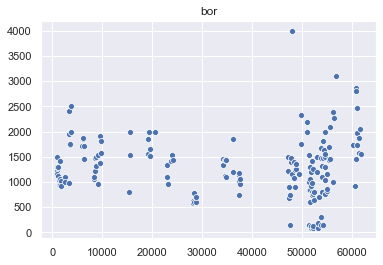

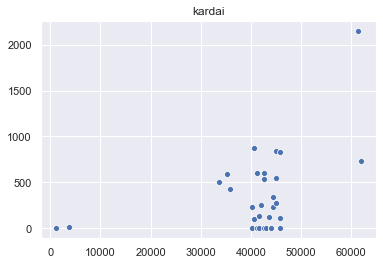

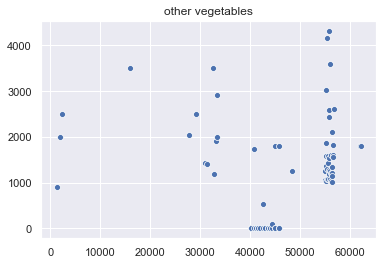

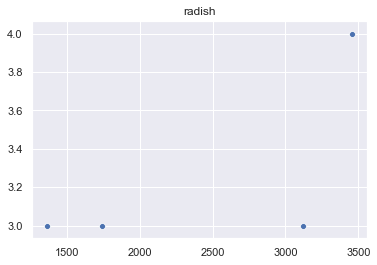

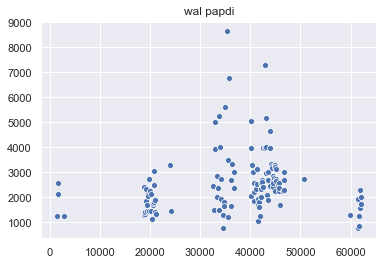

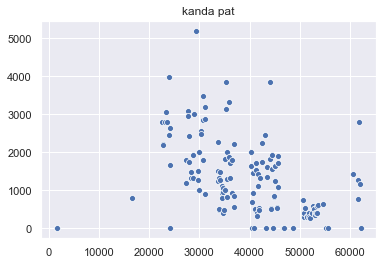

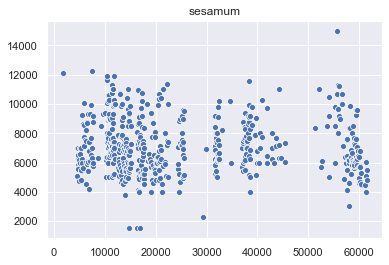

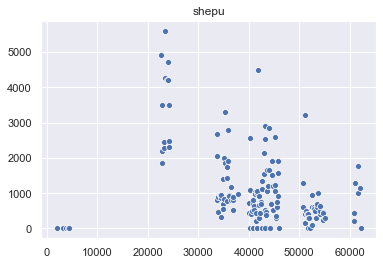

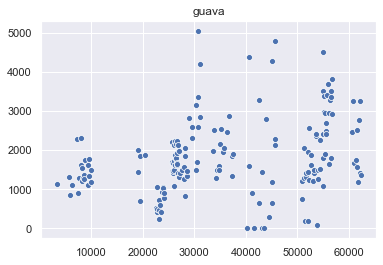

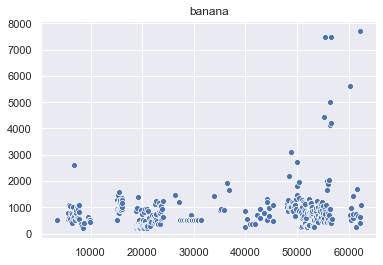

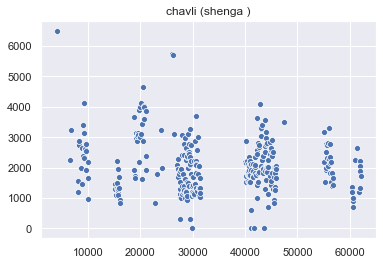

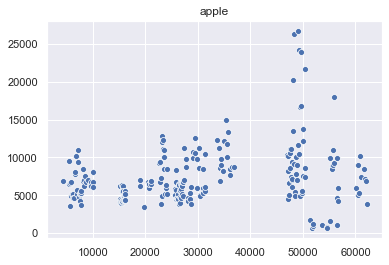

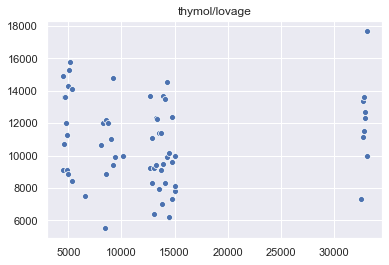

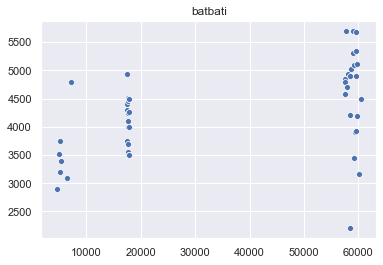

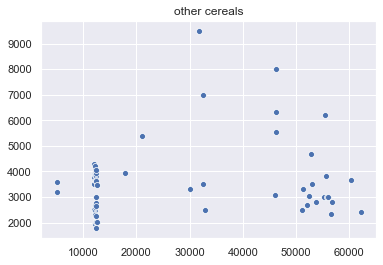

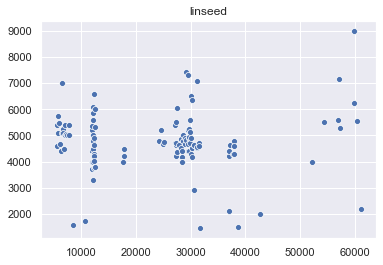

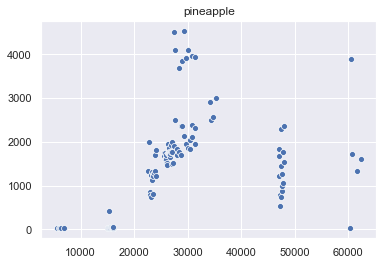

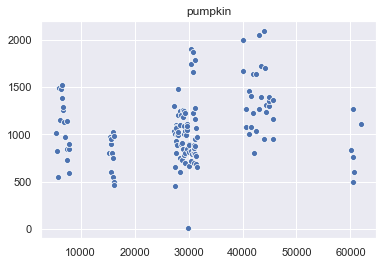

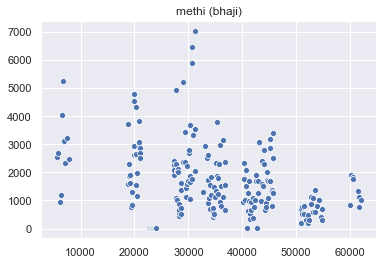

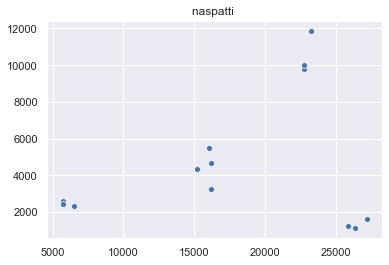

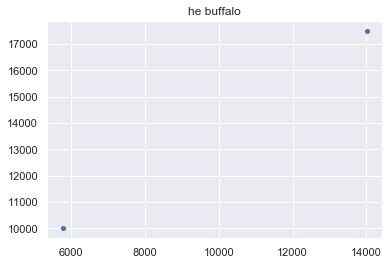

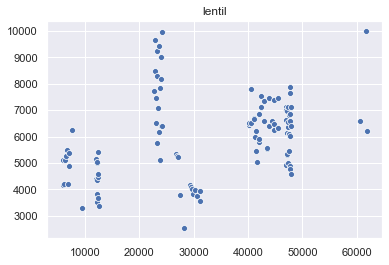

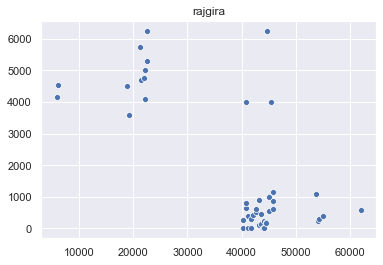

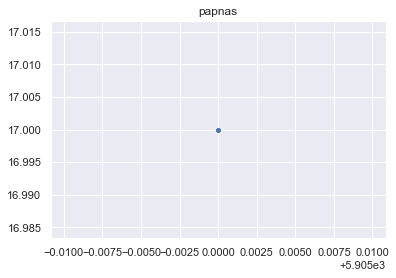

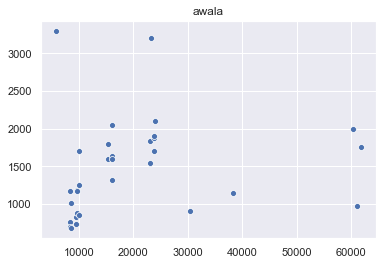

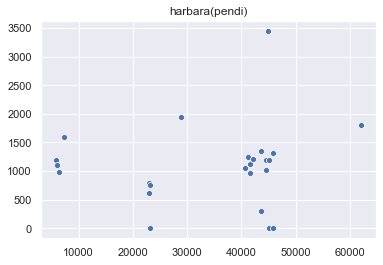

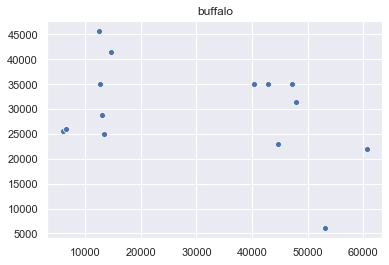

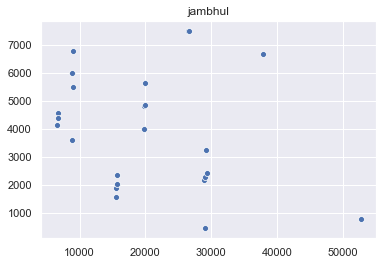

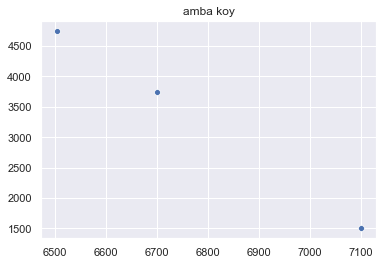

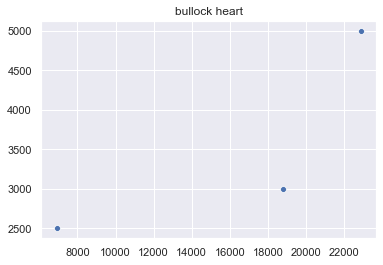

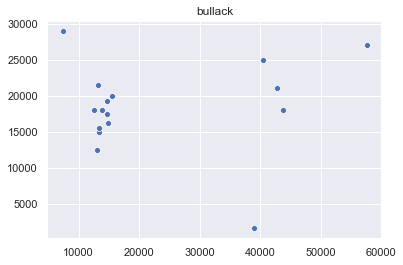

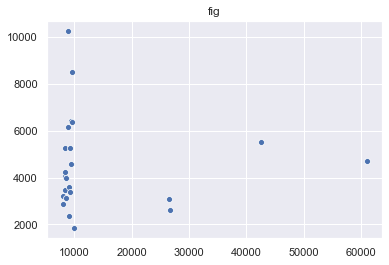

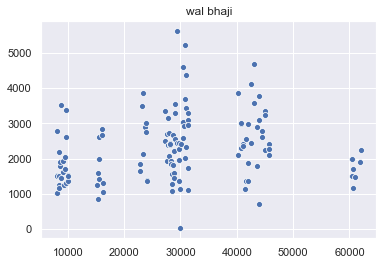

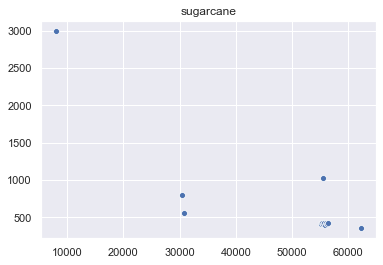

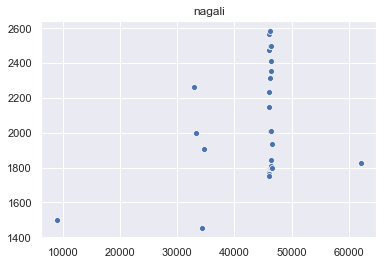

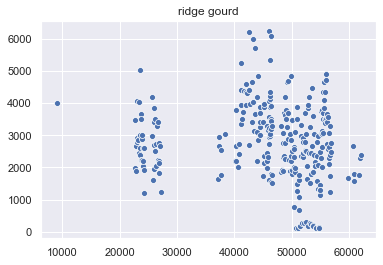

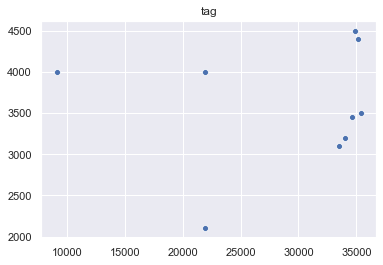

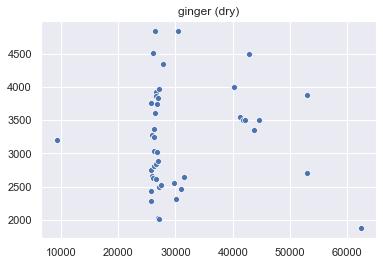

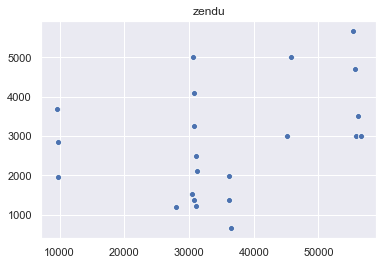

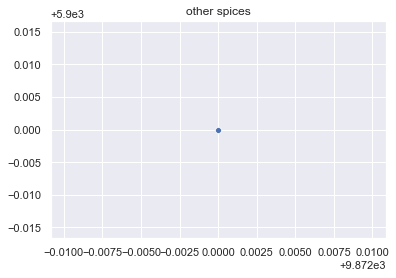

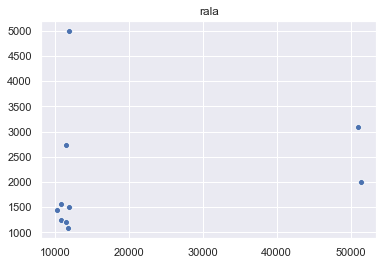

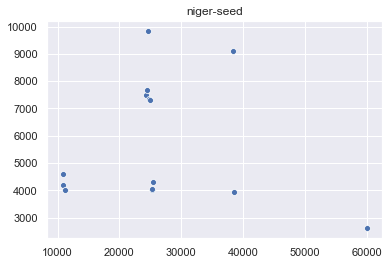

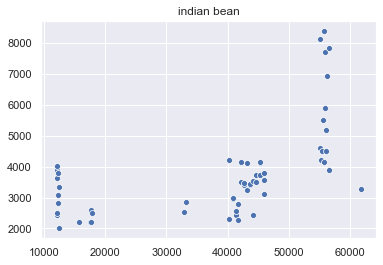

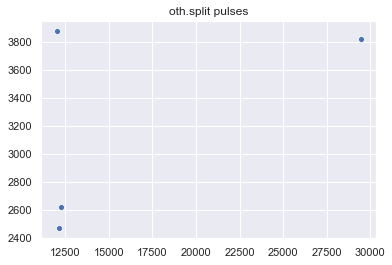

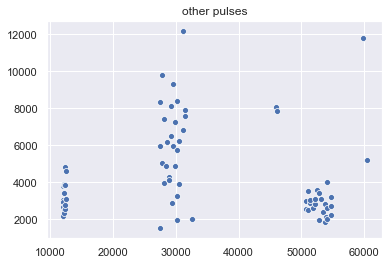

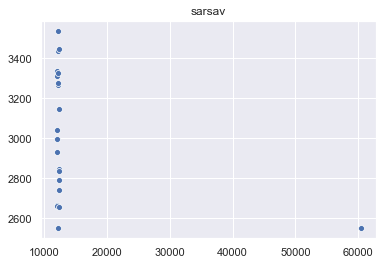

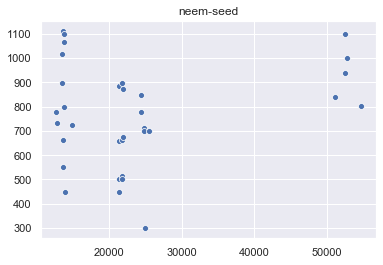

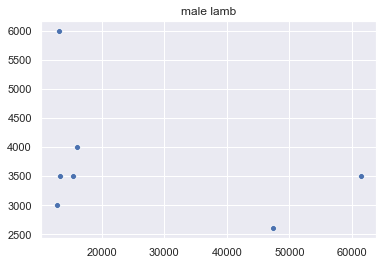

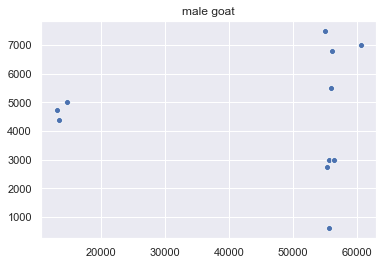

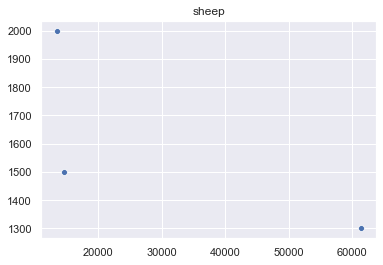

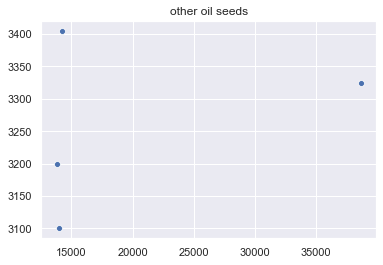

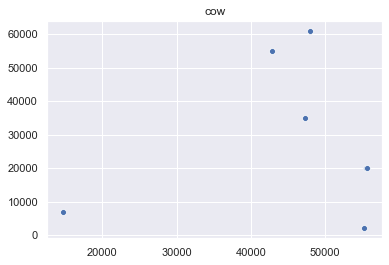

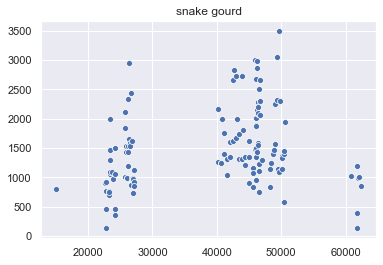

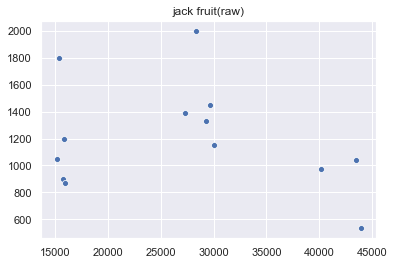

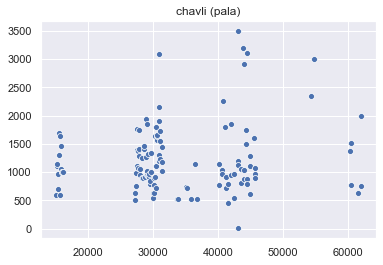

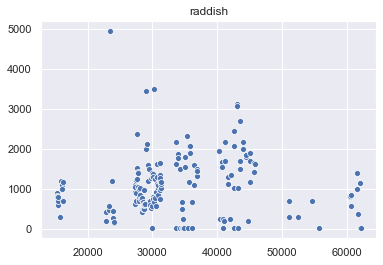

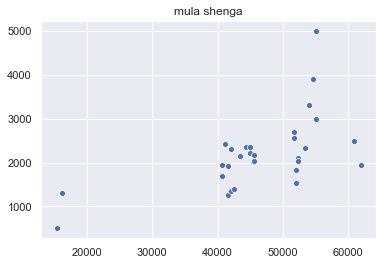

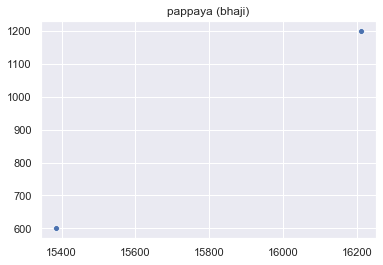

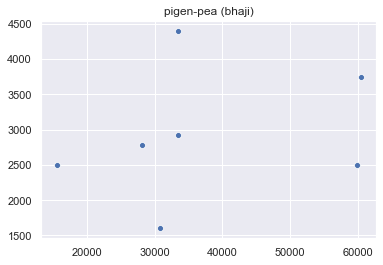

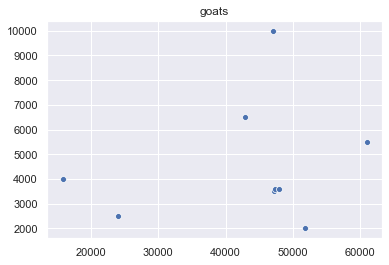

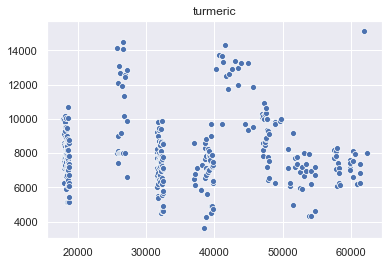

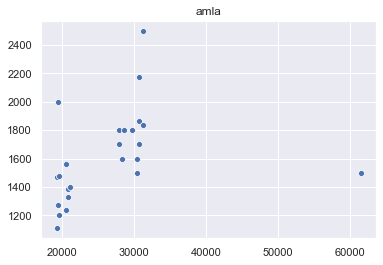

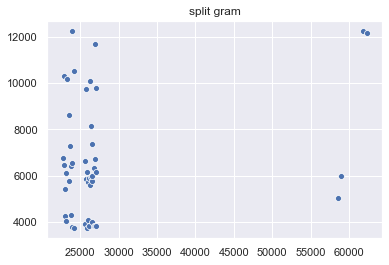

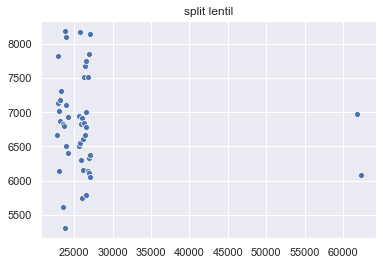

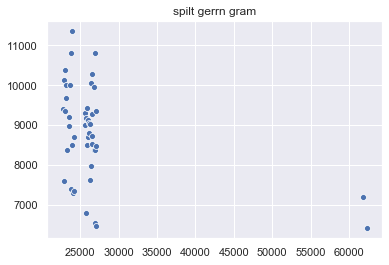

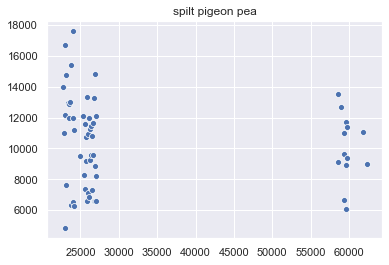

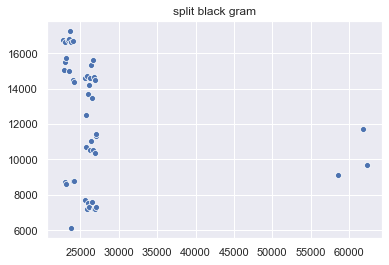

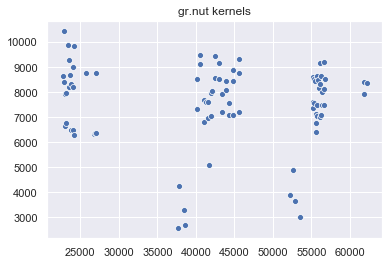

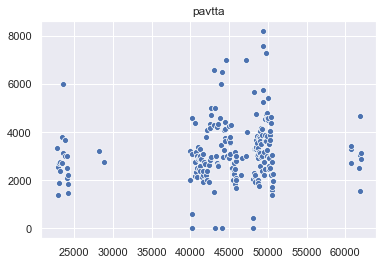

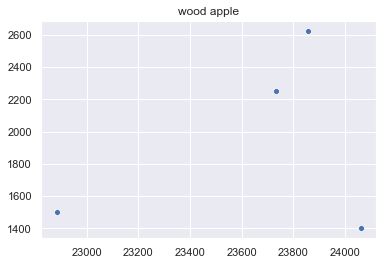

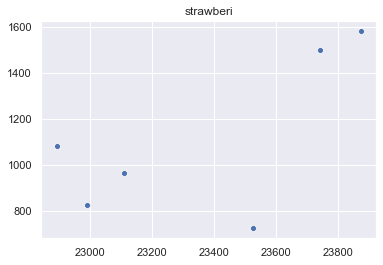

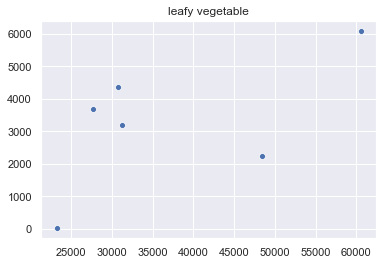

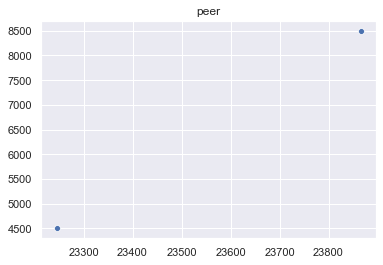

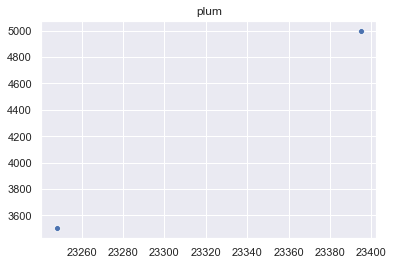

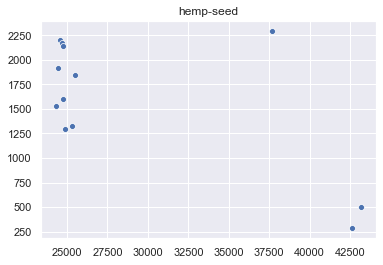

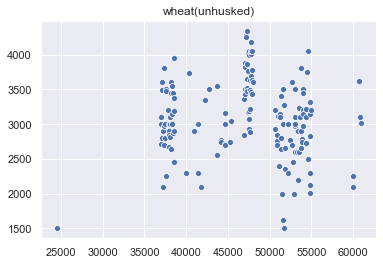

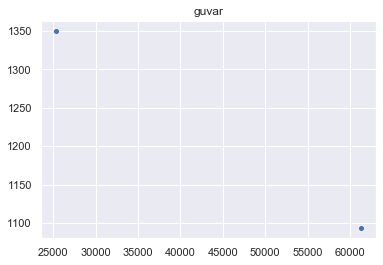

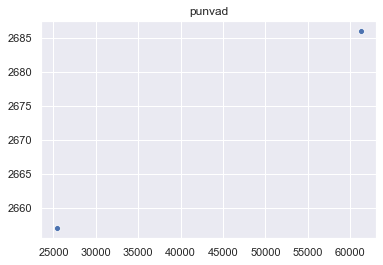

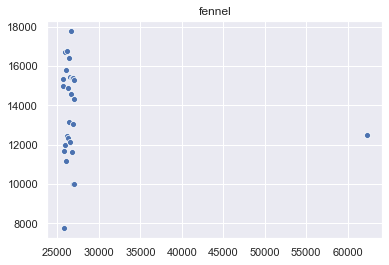

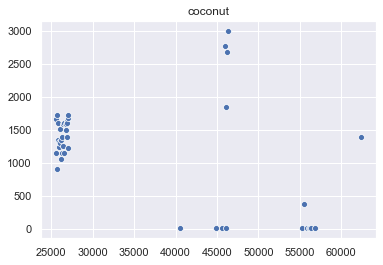

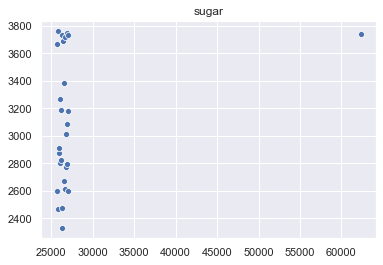

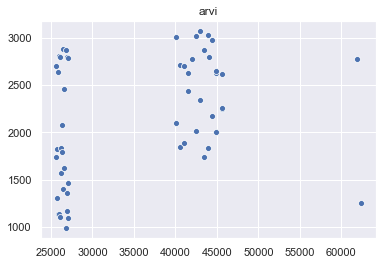

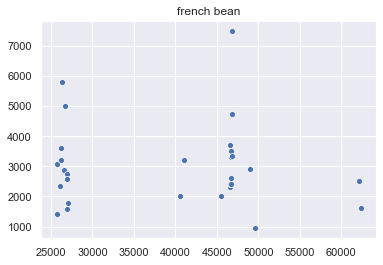

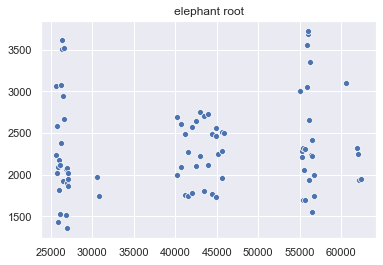

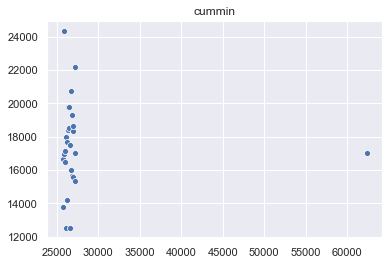

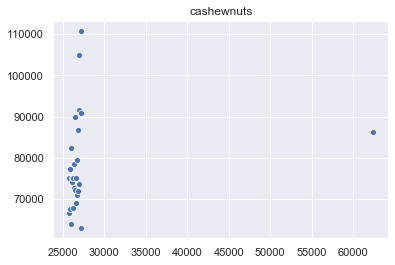

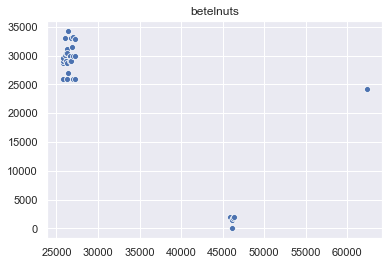

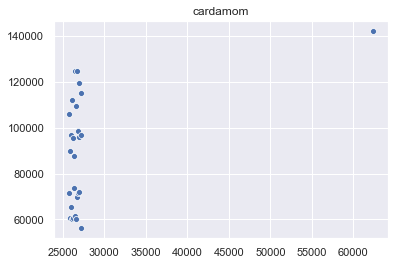

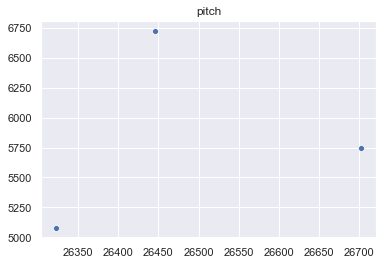

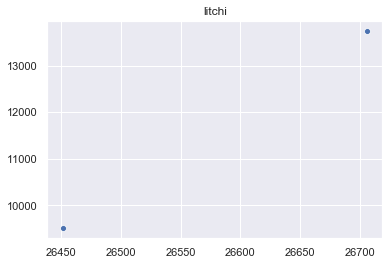

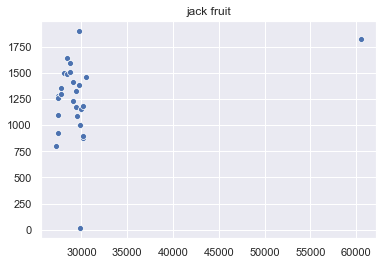

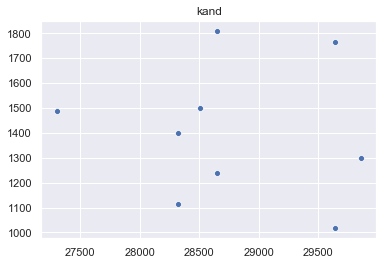

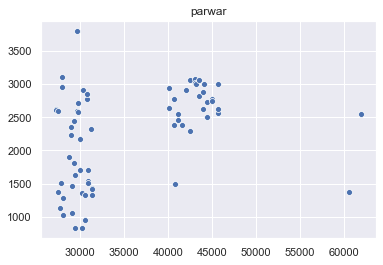

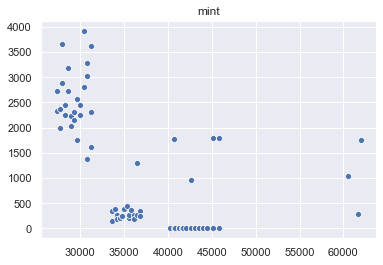

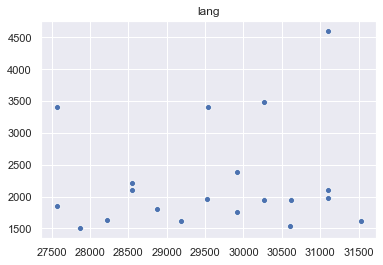

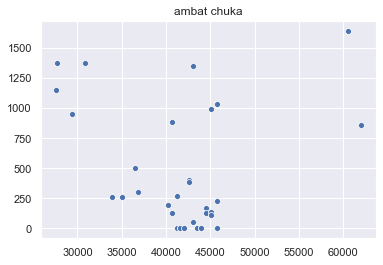

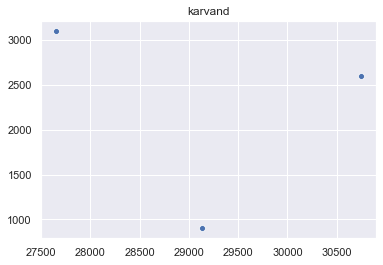

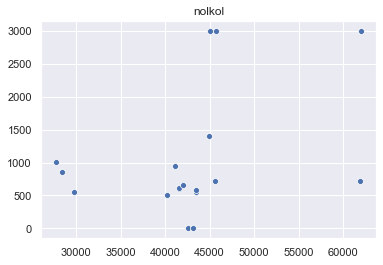

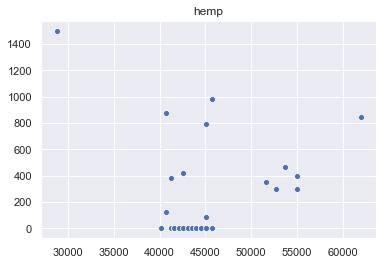

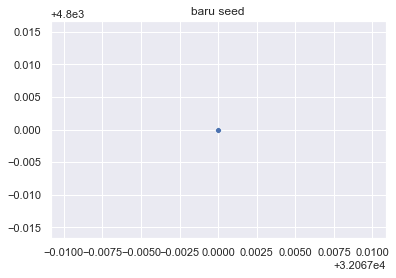

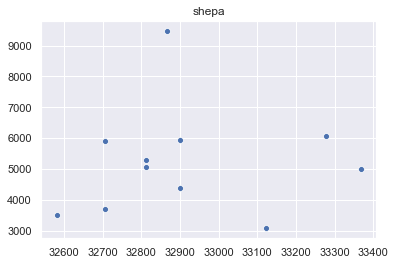

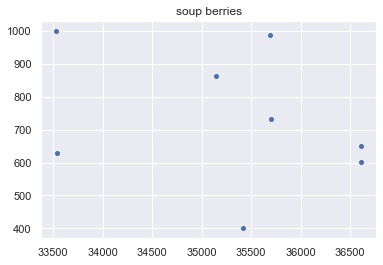

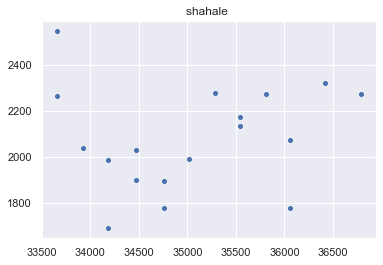

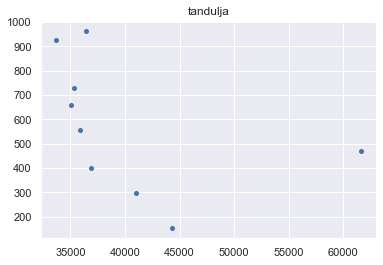

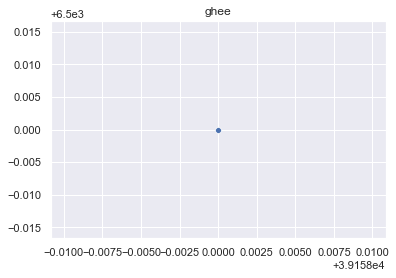

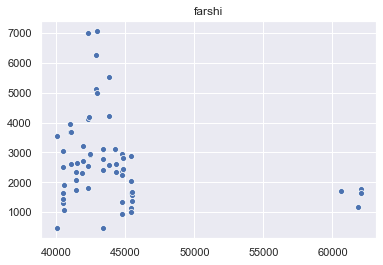

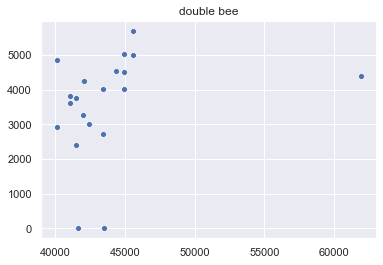

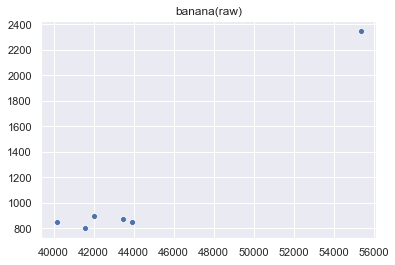

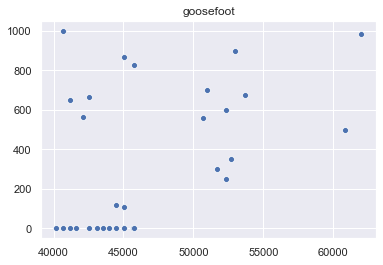

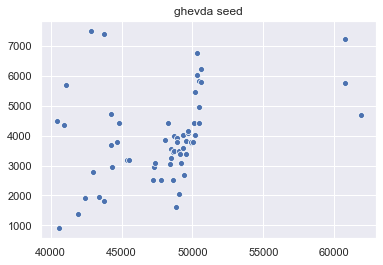

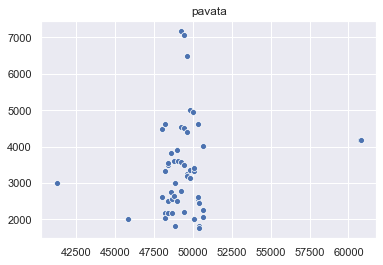

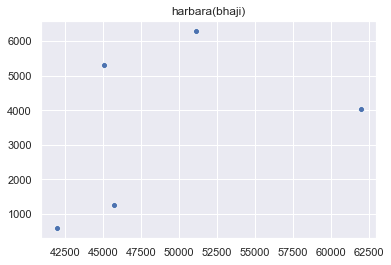

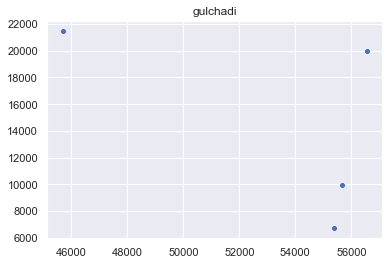

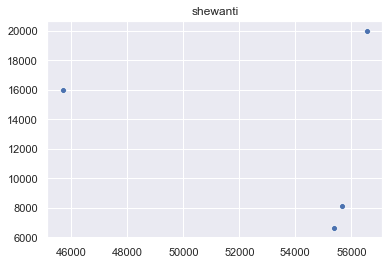

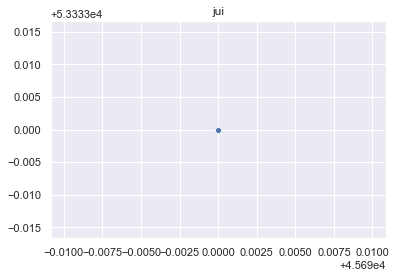

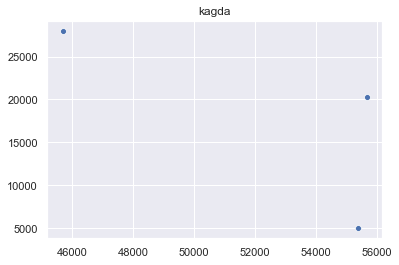

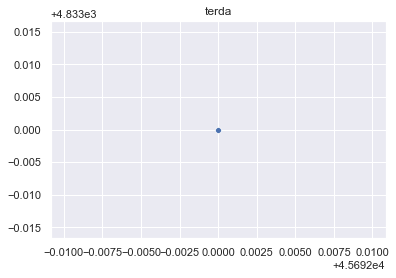

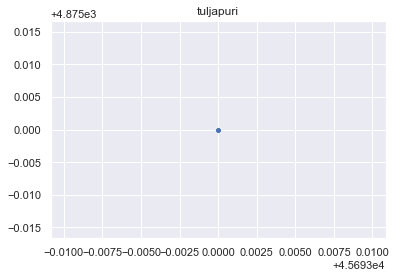

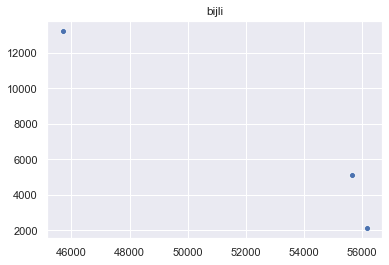

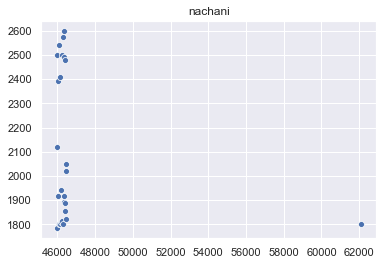

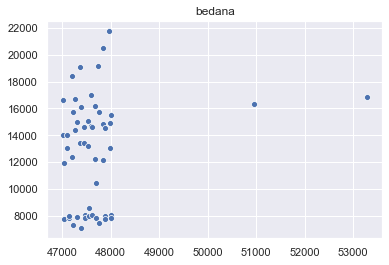

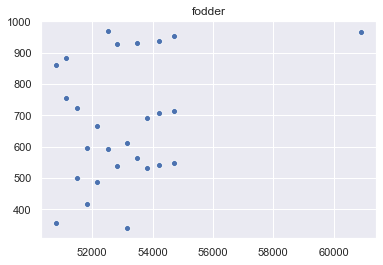

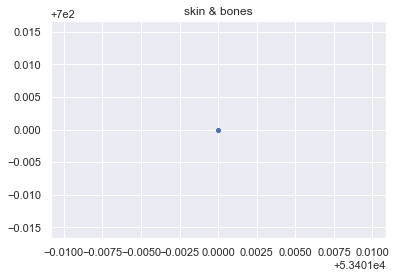

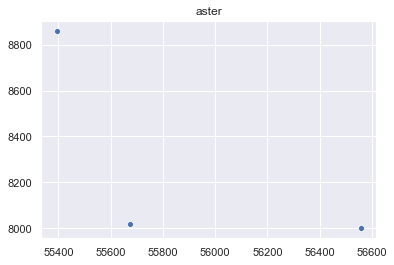

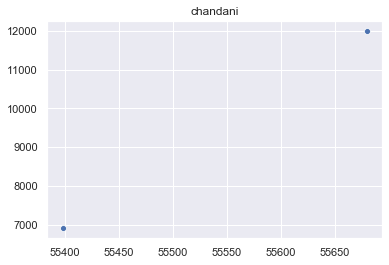

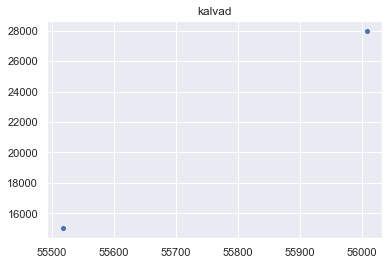

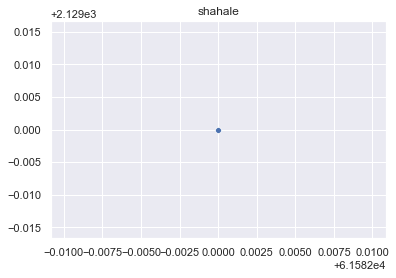

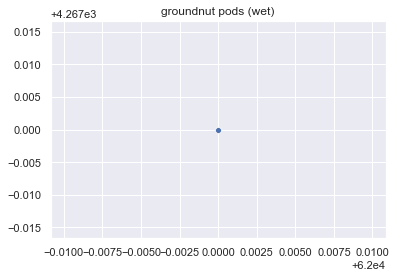

In [25]:
for i in range(len(list_of_commodity_items)):
    data_to_plot_each_commodity = df_of_train_after_index_removal[df_of_train_after_index_removal['Commodity'] == list_of_commodity_items[i]]
    modal_price_each_commodity = data_to_plot_each_commodity['modal_price']
    sns.set(style ="darkgrid") 
    sns.scatterplot(data=modal_price_each_commodity,size='size').set_title(list_of_commodity_items[i])
    plt.show()

In [26]:
# many commodities have very less data points(<10)

In [27]:
quantity_skew_each_commodity = {}
for i in range(len(list_of_commodity_items)):
    dummy_list = []
    data_to_plot_each_commodity = df_of_train_after_index_removal[df_of_train_after_index_removal['Commodity'] == list_of_commodity_items[i]]
    modal_price_each_commodity = data_to_plot_each_commodity['modal_price']
    dummy_list.append(len(data_to_plot_each_commodity))
    dummy_list.append(round(ss.skew(modal_price_each_commodity),3))
    quantity_skew_each_commodity[list_of_commodity_items[i]] = dummy_list


In [28]:
print(quantity_skew_each_commodity)

{'bajri': [2307, 3.063], 'wheat(husked)': [4023, 3.028], 'sorgum(jawar)': [3658, 0.791], 'maize': [2528, 6.315], 'gram': [4064, 0.887], 'horse gram': [180, 3.498], 'matki': [321, 0.153], 'pigeon pea (tur)': [3430, -0.111], 'black gram': [1661, 0.593], 'castor seed': [194, -2.107], 'soybean': [3656, 0.409], 'jaggery': [385, 0.554], 'lemon': [419, 1.487], 'ginger (fresh)': [513, 0.78], 'potato': [709, 1.513], 'ladies finger': [900, 0.093], 'flower': [821, 0.905], 'carrot': [476, 1.043], 'cluster bean': [699, 0.065], 'ghevda': [342, 1.209], 'ghosali(bhaji)': [186, 0.369], 'mango(raw)': [109, 1.056], 'cucumber': [832, 0.456], 'onion': [1865, 1.903], 'bitter gourd': [802, 0.327], 'cabbage': [883, 2.036], 'garlic': [575, 0.714], 'math (bhaji)': [160, 1.271], 'capsicum': [639, 1.153], 'tomato': [999, 1.757], 'brinjal': [990, 0.923], 'tamarind': [228, 0.465], 'tamarind seed': [47, -1.514], 'coriander (dry)': [328, 1.006], 'green chilli': [841, 0.691], 'chillies(red)': [500, 0.651], 'mustard': 

In [29]:
print(sorted(quantity_skew_each_commodity.values()))

[[1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [2, 0.0], [2, 0.0], [2, 0.0], [2, 0.0], [2, 0.0], [2, 0.0], [2, 0.0], [2, 0.0], [2, 0.0], [3, -0.561], [3, -0.431], [3, -0.382], [3, 0.218], [3, 0.47], [3, 0.496], [3, 0.595], [3, 0.706], [4, -0.091], [4, -0.077], [4, -0.018], [4, 0.161], [4, 0.18], [4, 1.155], [5, -0.144], [5, 1.5], [6, -0.299], [6, 0.374], [6, 1.777], [7, 0.323], [7, 0.347], [7, 1.355], [8, -0.059], [9, -0.635], [9, 0.045], [9, 0.188], [9, 1.232], [10, 1.478], [11, -0.278], [11, 1.179], [12, -0.88], [13, 0.478], [13, 2.811], [14, -0.667], [14, 0.442], [14, 1.039], [16, -0.815], [17, 0.144], [18, 0.102], [18, 1.356], [20, 1.562], [21, -1.313], [21, 0.054], [22, 0.375], [23, 0.699], [23, 1.203], [24, 0.122], [24, 0.792], [25, 1.141], [27, -1.151], [27, -0.445], [27, 0.091], [27, 0.171], [27, 0.356], [27, 0.364], [27, 0.569], [27, 1.203], [29, 1.192], [29, 1.451], [30, 0.97], [30, 1.584], [31, -1.653], [31, 0.3

In [30]:
#note that many of the commodities have their quantity less than 10


In [31]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

In [32]:
mod_zscore_goals, mad_goals = modified_zscore(df_of_train_after_index_removal['modal_price'])
df_of_train_after_index_removal = df_of_train_after_index_removal.assign(mod_zscore=mod_zscore_goals)

In [33]:
new_data = pd.DataFrame()

In [34]:
for i in range(len(list_of_commodity_items)):
    commodity = list_of_commodity_items[i]
    if ((quantity_skew_each_commodity[commodity][1]<=3) or (quantity_skew_each_commodity[commodity][1]>=-3)):
    
        data = df_of_train_after_index_removal[df_of_train_after_index_removal['Commodity'] == commodity]
        mod_zscore_goals, mad_goals = modified_zscore(data['modal_price'])
        data = data.assign(mod_zscore=mod_zscore_goals)       
        data = data[(data['mod_zscore'] <= 2)]
        data = data[data['mod_zscore'] >= -2]
        new_data = new_data.append(data,ignore_index=True)                   
               
    
                                                                         
                    
                
               
               

C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [35]:
no_of_outlier_detected_zscore = len(df_of_train_after_index_removal) - len(new_data)

In [36]:
print(no_of_outlier_detected_zscore)

4753


In [37]:
list_newdata_commodity = new_data['Commodity'].unique()
print(len(list_newdata_commodity))
print(list_newdata_commodity)

190
['bajri' 'wheat(husked)' 'sorgum(jawar)' 'maize' 'gram' 'horse gram'
 'matki' 'pigeon pea (tur)' 'black gram' 'castor seed' 'soybean' 'jaggery'
 'lemon' 'ginger (fresh)' 'potato' 'ladies finger' 'flower' 'carrot'
 'cluster bean' 'ghevda' 'ghosali(bhaji)' 'mango(raw)' 'cucumber' 'onion'
 'bitter gourd' 'cabbage' 'garlic' 'math (bhaji)' 'capsicum' 'tomato'
 'brinjal' 'tamarind' 'tamarind seed' 'coriander (dry)' 'green chilli'
 'chillies(red)' 'mustard' 'paddy-unhusked' 'chikoo' 'cotton'
 'ground nut pods (dry)' 'pomegranate' 'papai' 'melon' 'beet root'
 'bottle gourd' 'dhemse' 'coriander ' 'coriander  ' 'spinach' 'shevga'
 'small gourd' 'grapes' 'kharbuj' 'green gram' 'sunflower' 'safflower'
 'mango' 'water melon' 'mosambi' 'orange' 'fenugreek' 'cowpea'
 'green peas (dry)' 'squash gourd' 'chino' 'curry leaves' 'sweet potato'
 'walvad' 'rice(paddy-hus)' 'custard apple' 'green-peas' 'maize(corn.)'
 'bhagar/vari' 'bor' 'kardai' 'other vegetables' 'wal papdi' 'kanda pat'
 'sesamum' 'shep

In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [39]:
dic_commodity_stationary = {}
for i in range(len(list_newdata_commodity)):
    commodity = list_newdata_commodity[i]
    data = new_data[new_data['Commodity'] == commodity]
    data = data['modal_price']
    if len(data) > 3:
        stationary_data = test_stationarity(data)
        if stationary_data['Test Statistic'] > stationary_data['Critical Value (1%)']:
            dic_commodity_stationary[commodity] = 'N'
        else:
            dic_commodity_stationary[commodity] = 'Y'
    else:
        dic_commodity_stationary[commodity] = -1

In [40]:
# Y denotes commodity is stationary & N denotes commodity is non-stationary & -1 denotes sample size is less than or equal to 3 for which dickey fuller doesn't work
print(dic_commodity_stationary)

{'bajri': 'Y', 'wheat(husked)': 'Y', 'sorgum(jawar)': 'Y', 'maize': 'Y', 'gram': 'Y', 'horse gram': 'Y', 'matki': 'Y', 'pigeon pea (tur)': 'Y', 'black gram': 'Y', 'castor seed': 'Y', 'soybean': 'Y', 'jaggery': 'Y', 'lemon': 'Y', 'ginger (fresh)': 'Y', 'potato': 'Y', 'ladies finger': 'Y', 'flower': 'Y', 'carrot': 'Y', 'cluster bean': 'Y', 'ghevda': 'Y', 'ghosali(bhaji)': 'Y', 'mango(raw)': 'Y', 'cucumber': 'Y', 'onion': 'Y', 'bitter gourd': 'Y', 'cabbage': 'Y', 'garlic': 'Y', 'math (bhaji)': 'N', 'capsicum': 'Y', 'tomato': 'Y', 'brinjal': 'Y', 'tamarind': 'Y', 'tamarind seed': 'Y', 'coriander (dry)': 'Y', 'green chilli': 'Y', 'chillies(red)': 'N', 'mustard': 'Y', 'paddy-unhusked': 'N', 'chikoo': 'Y', 'cotton': 'Y', 'ground nut pods (dry)': 'Y', 'pomegranate': 'Y', 'papai': 'Y', 'melon': 'N', 'beet root': 'Y', 'bottle gourd': 'Y', 'dhemse': 'Y', 'coriander ': 'N', 'coriander  ': 'Y', 'spinach': 'N', 'shevga': 'Y', 'small gourd': 'Y', 'grapes': 'N', 'kharbuj': 'Y', 'green gram': 'Y', 'sun

In [67]:
zero_commodity_price = {}
for i in range(len(list_newdata_commodity)):
    dummy = []
    commodity = list_newdata_commodity[i]
    data = new_data[new_data['Commodity'] == commodity]
    zero_data = data[data['modal_price'] == 0]
    dummy.append(len(data))
    dummy.append(len(zero_data))
    zero_commodity_price[commodity] = dummy
    

In [68]:
print(zero_commodity_price)

{'bajri': [2203, 0], 'wheat(husked)': [3626, 0], 'sorgum(jawar)': [3455, 0], 'maize': [2368, 0], 'gram': [3596, 0], 'horse gram': [160, 0], 'matki': [287, 0], 'pigeon pea (tur)': [3404, 0], 'black gram': [1586, 0], 'castor seed': [183, 0], 'soybean': [3397, 0], 'jaggery': [368, 0], 'lemon': [393, 0], 'ginger (fresh)': [474, 0], 'potato': [644, 0], 'ladies finger': [850, 0], 'flower': [751, 0], 'carrot': [441, 0], 'cluster bean': [675, 0], 'ghevda': [304, 0], 'ghosali(bhaji)': [180, 0], 'mango(raw)': [92, 0], 'cucumber': [761, 0], 'onion': [1648, 0], 'bitter gourd': [754, 0], 'cabbage': [736, 0], 'garlic': [549, 0], 'math (bhaji)': [152, 0], 'capsicum': [563, 0], 'tomato': [880, 0], 'brinjal': [914, 0], 'tamarind': [224, 0], 'tamarind seed': [42, 0], 'coriander (dry)': [295, 0], 'green chilli': [779, 0], 'chillies(red)': [470, 0], 'mustard': [198, 0], 'paddy-unhusked': [807, 0], 'chikoo': [295, 0], 'cotton': [931, 0], 'ground nut pods (dry)': [1044, 0], 'pomegranate': [492, 0], 'papai':

In [69]:
# replacing 0 values with mean of that commodity
for i in range(len(list_newdata_commodity)):
    commodity = list_newdata_commodity[i]
    if zero_commodity_price[commodity][1] > 0:
        data = new_data[new_data['Commodity'] == commodity]
        value = data['modal_price'].mean()
        data['modal_price'] = data['modal_price'].mask(data['modal_price'] == 0, value)
        new_data[new_data['Commodity'] == commodity] = data

In [70]:
new_dic_commodity_stationary = {}
for i in range(len(list_newdata_commodity)):
    commodity = list_newdata_commodity[i]
    data = new_data[new_data['Commodity'] == commodity]
    if len(data) > 4:
        if dic_commodity_stationary[commodity] == 'N':
       
        
            #data['modal_price'] = np.log(data['modal_price'])
            data = data['modal_price']
        
            diff_data = data - data.shift()
            diff_data.dropna(inplace=True)
            stationary_data = test_stationarity(diff_data)
            if stationary_data['Test Statistic'] > stationary_data['Critical Value (10%)']:
                new_dic_commodity_stationary[commodity] = 'N'
            else:
                new_dic_commodity_stationary[commodity] = 'Y'
        else:
            new_dic_commodity_stationary[commodity] = 'Y'
        
    else:
        new_dic_commodity_stationary[commodity] = -1
    

In [71]:
print(new_dic_commodity_stationary)

{'bajri': 'Y', 'wheat(husked)': 'Y', 'sorgum(jawar)': 'Y', 'maize': 'Y', 'gram': 'Y', 'horse gram': 'Y', 'matki': 'Y', 'pigeon pea (tur)': 'Y', 'black gram': 'Y', 'castor seed': 'Y', 'soybean': 'Y', 'jaggery': 'Y', 'lemon': 'Y', 'ginger (fresh)': 'Y', 'potato': 'Y', 'ladies finger': 'Y', 'flower': 'Y', 'carrot': 'Y', 'cluster bean': 'Y', 'ghevda': 'Y', 'ghosali(bhaji)': 'Y', 'mango(raw)': 'Y', 'cucumber': 'Y', 'onion': 'Y', 'bitter gourd': 'Y', 'cabbage': 'Y', 'garlic': 'Y', 'math (bhaji)': 'Y', 'capsicum': 'Y', 'tomato': 'Y', 'brinjal': 'Y', 'tamarind': 'Y', 'tamarind seed': 'Y', 'coriander (dry)': 'Y', 'green chilli': 'Y', 'chillies(red)': 'Y', 'mustard': 'Y', 'paddy-unhusked': 'Y', 'chikoo': 'Y', 'cotton': 'Y', 'ground nut pods (dry)': 'Y', 'pomegranate': 'Y', 'papai': 'Y', 'melon': 'Y', 'beet root': 'Y', 'bottle gourd': 'Y', 'dhemse': 'Y', 'coriander ': 'N', 'coriander  ': 'Y', 'spinach': 'Y', 'shevga': 'Y', 'small gourd': 'Y', 'grapes': 'Y', 'kharbuj': 'Y', 'green gram': 'Y', 'sun